<a href="https://colab.research.google.com/github/hemanth714444/daup-project-2192/blob/main/study_hour_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None
Skewness:
 Hours     0.190338
Scores    0.233965
dtype: float64


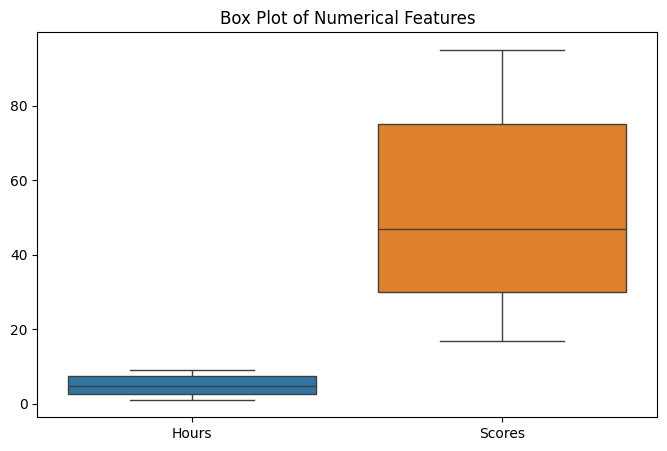

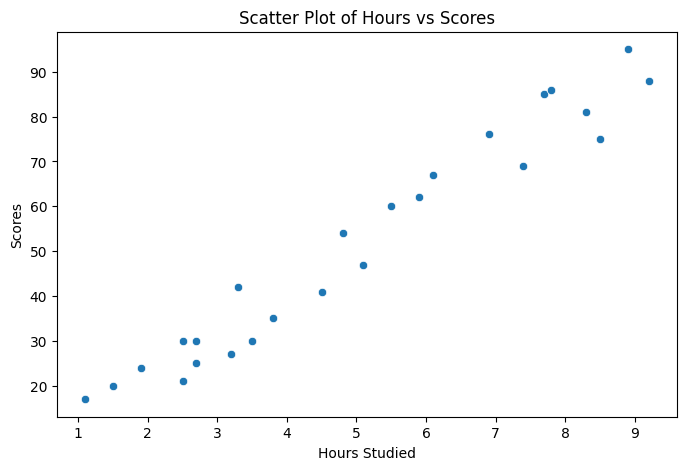


Model Performance:

Linear Regression:
  MAE: 3.9208
  MSE: 18.9432
  R2 Score: 0.9678

Decision Tree:
  MAE: 5.4000
  MSE: 31.7000
  R2 Score: 0.9461

Random Forest:
  MAE: 3.1400
  MSE: 14.9402
  R2 Score: 0.9746


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "/content/Study Hour(Linear Regression).csv"
df = pd.read_csv(file_path)

# Check dataset info
print(df.info())

# Check skewness of numerical columns
print("Skewness:\n", df.skew())

# Box plot for numerical columns
plt.figure(figsize=(8, 5))
sns.boxplot(data=df)
plt.title("Box Plot of Numerical Features")
plt.show()

# Scatter plot between Hours and Scores
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Hours'], y=df['Scores'])
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.title("Scatter Plot of Hours vs Scores")
plt.show()

# Preprocessing: Scaling numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Splitting data into train and test sets
X = df[['Hours']]
y = df['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=10, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    }

# Display results
print("\nModel Performance:")
for model, metrics in results.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
